# <span style="color: #4A90E2;">Facial Expression Recognition Project Overview</span>

## <span style="color: #7B7B7B;">1. Project Description</span>
This project aims to build a Convolutional Neural Network (CNN) model for recognizing facial expressions from images. The model is trained on a dataset containing various emotions, including happiness, sadness, surprise, anger, and more. By utilizing deep learning techniques, the goal is to accurately classify facial expressions based on visual input.

## <span style="color: #7B7B7B;">2. Objectives</span>
- Develop a robust CNN architecture for facial expression classification.
- Implement data augmentation techniques to improve model generalization.
- Visualize data distributions, including class distributions and image dimensions.
- Evaluate model performance using classification metrics and confusion matrices.
- Deploy the model using Flask to create a web application for real-time emotion detection.

## <span style="color: #7B7B7B;">3. Dataset</span>
The project utilizes the **Facial Expression Dataset**, which contains images of faces labeled with various emotions. The dataset is divided into training and testing sets to evaluate the model's performance effectively. Each emotion is stored in separate directories, enabling easy access and manipulation.

## <span style="color: #7B7B7B;">4. Key Libraries Used</span>
- **TensorFlow** and **Keras**: For building and training the CNN model.
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations and array manipulations.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Flask**: For deploying the trained model as a web application.
- **PIL**: For image processing tasks.

## <span style="color: #7B7B7B;">5. Methodology</span>
- **Data Preprocessing**: Images are resized, normalized, and augmented to enhance model robustness. The dataset's structure is inspected to ensure correct loading.
- **Model Architecture**: A CNN model is constructed with layers including convolutional, pooling, dropout, and dense layers.
- **Training**: The model is trained using a subset of data, with early stopping and model checkpoints implemented to save the best performing model.
- **Evaluation**: The model's performance is assessed through confusion matrices and classification reports, ensuring that the accuracy meets the project's standards.

## <span style="color: #7B7B7B;">6. Visualization</span>
Several visualizations are created to understand the dataset better, including:
- Bar plots for class distributions in training and testing datasets.
- Histograms and boxplots for image dimensions.
- Sample images from each class, both original and augmented.

## <span style="color: #7B7B7B;">7. Deployment</span>
The trained model is deployed using a Flask web application, allowing users to upload images and receive predictions for the corresponding facial expressions in real time.

## <span style="color: #7B7B7B;">8. Future Work</span>
Potential future enhancements may include:
- Implementing more advanced architectures (e.g., ResNet, Inception) for improved accuracy.
- Expanding the dataset to include more diverse expressions.
- Exploring the integration of the model with real-time video processing for live emotion detection.

## <span style="color: #7B7B7B;">9. Conclusion</span>
This project serves as a comprehensive approach to facial expression recognition using deep learning techniques. The outcome not only demonstrates the model's effectiveness but also provides a basis for further research and development in the field of emotion recognition.

# <span style="color:blue;">Importing Libraries</span>

In this step, we import the necessary libraries required for the project. Each library serves a specific purpose:

- **os**: Allows interaction with the operating system, enabling us to navigate directories and manage file paths.
- **numpy**: A fundamental package for numerical operations in Python, providing support for large, multi-dimensional arrays and matrices.
- **pandas**: A powerful data manipulation and analysis library that provides data structures for efficiently storing and manipulating structured data.
- **matplotlib.pyplot**: A plotting library used for creating static, animated, and interactive visualizations in Python.
- **seaborn**: A statistical data visualization library based on Matplotlib, providing a high-level interface for drawing attractive statistical graphics.
- **tensorflow.keras.preprocessing.image**: Contains tools for image preprocessing and data augmentation, which are essential for preparing images for training.
- **tensorflow.keras.models**: Provides a way to create deep learning models using a high-level interface.
- **tensorflow.keras.layers**: Contains various layers that can be used to build deep learning models, such as convolutional layers and pooling layers.
- **tensorflow.keras.callbacks**: Contains utility functions for managing training and evaluation, including early stopping and model checkpoints.
- **sklearn.metrics**: Provides tools for evaluating model performance using metrics like classification report and confusion matrix.
- **flask**: A micro web framework for Python that enables us to create a web application for model deployment.
- **PIL (Python Imaging Library)**: A library used for image processing tasks, providing capabilities for opening, manipulating, and saving images.
- **warnings**: A built-in Python module that allows us to control the display of warning messages.

In [25]:
!pip install --upgrade keras  # Upgrade Keras to the latest version

In [26]:
!pip install --upgrade tensorflow  # Upgrade TensorFlow to the latest version

In [27]:
!pip install tensorflow flask  # Install TensorFlow and Flask for model deployment

In [14]:
# Import necessary libraries

In [15]:
import os  # For interacting with the operating system

In [16]:
import numpy as np  # For numerical operations

In [17]:
import pandas as pd  # For data manipulation and analysis

In [18]:
import matplotlib.pyplot as plt  # For plotting graphs

In [19]:
import seaborn as sns  # For statistical data visualization

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image preprocessing

In [21]:
from tensorflow.keras.models import Sequential  # For creating sequential models

In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # For building CNN layers

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # For model training callbacks

In [24]:
from tensorflow.keras.models import load_model  # For loading a saved model

In [28]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img  # For image conversion and loading

In [29]:
from sklearn.metrics import classification_report, confusion_matrix  # For evaluation metrics

In [30]:
from flask import Flask, request, jsonify  # For creating a web app

In [31]:
from PIL import Image  # Importing Image from PIL for image processing

In [32]:
import warnings  # Importing the warnings module

In [33]:
# Suppress warnings (optional)

In [34]:
warnings.filterwarnings('ignore')  # Ignore all warnings

# <span style="color:blue;">Preprocessing the Data</span>

In this section, we set up the directory paths for the training and testing data. This step is crucial as it allows the program to access the dataset and perform necessary operations, such as loading images for model training and evaluation.

- **train_dir**: Specifies the path to the training dataset containing facial expression images organized by emotion.
- **test_dir**: Specifies the path to the testing dataset for evaluating model performance, also organized by emotion.

In [35]:
# Loading the Data

In [36]:
train_dir = '/content/facial_expression_data/train'  # Directory for training data

In [37]:
test_dir = '/content/facial_expression_data/test'  # Directory for testing data

# <span style="color:blue;">Inspecting the Dataset</span>

This step involves inspecting the structure of the training and testing directories. We loop through each emotion folder to count the number of images available in each class.

- The output provides insights into the dataset's balance across different emotions, which is important for training a robust model.

In [38]:
# Inspecting the Dataset

In [39]:
print("Training directory structure:")  # Print statement for training directory structure
for emotion in os.listdir(train_dir):  # Loop through each emotion folder in the training directory
    print(f"{emotion}: {len(os.listdir(os.path.join(train_dir, emotion)))} images")  # Print the number of images per emotion


Training directory structure:
angry: 3995 images
sad: 4830 images
happy: 7215 images
disgust: 436 images
neutral: 4965 images
fear: 4097 images
surprise: 3171 images


In [40]:
print("\nTesting directory structure:")  # Print statement for testing directory structure
for emotion in os.listdir(test_dir):  # Loop through each emotion folder in the testing directory
    print(f"{emotion}: {len(os.listdir(os.path.join(test_dir, emotion)))} images")  # Print the number of images per emotion



Testing directory structure:
angry: 958 images
sad: 1247 images
happy: 1774 images
disgust: 111 images
neutral: 1233 images
fear: 1024 images
surprise: 831 images


# <span style="color:blue;">Count Total Images in Each Directory</span>

Here, we define a function to count the total number of images present in both the training and testing directories. This function utilizes the `os.walk()` method to traverse through the directory structure and accumulate the total count of images.

- **total_train_images**: Stores the count of images in the training directory.
- **total_test_images**: Stores the count of images in the testing directory.

In [41]:
# Count total images in each directory

In [42]:
def count_images(dir_path):  # Define a function to count images in a directory
    return sum(len(files) for _, _, files in os.walk(dir_path))  # Return the total number of images

In [43]:
total_train_images = count_images(train_dir)  # Get the total number of training images

In [44]:
total_test_images = count_images(test_dir)  # Get the total number of testing images

In [45]:
print(f"\nTotal training images: {total_train_images}")  # Print the total training images
print(f"Total testing images: {total_test_images}")  # Print the total testing images


Total training images: 28709
Total testing images: 7178


# **EXPLANATORY DATA ANALYSIS**

# <span style="color:blue;">Visualizing the Distribution of Classes</span>

In this step, we visualize the distribution of images across different emotion classes in the training dataset using a bar plot.

- We create a bar plot that displays the number of images corresponding to each emotion, allowing us to assess the class distribution visually.

# <span style="color:blue;">Plotting Sample Images from Each Class</span>

We define a function to randomly select and display sample images from each emotion class in the training dataset. This helps in visually assessing the dataset and understanding the variety of expressions within each emotion.

- The function retrieves a specified number of sample images and displays them in a grid format.

# <span style="color:blue;">Visualizing Image Dimensions</span>

This step involves analyzing the dimensions of the images in the training dataset. We define a function to gather width and height dimensions of each image and visualize the distribution of these dimensions using histograms.

- Understanding image dimensions is essential for setting the input shape for the neural network.

# <span style="color:blue;">Analyzing Image Sizes</span>

In this step, we create box plots to analyze the distribution of image dimensions in terms of width and height. This visualization provides insights into the range and variability of image sizes.

- Box plots are effective in identifying potential outliers and assessing the overall distribution of the dimensions.

# <span style="color:blue;">Correlation Analysis of Image Dimensions</span>

We create a scatter plot to analyze the correlation between image width and height. This visualization helps us determine whether there is a relationship between the two dimensions.

- A reference line is included to visually represent the correlation.

# <span style="color:blue;">Visualizing Sample Images with Augmentation</span>

In this step, we define a function to demonstrate image augmentation techniques such as flipping and rotating images. This helps in understanding how these transformations can be applied to enhance the dataset.

- Augmented images are displayed alongside the original image for comparison.

# <span style="color:blue;">Visualizing Emotion Distribution in Testing Data</span>

We visualize the distribution of emotion classes in the testing dataset using a bar plot, similar to the training data. This provides insights into the balance of classes available for evaluation.

- Assessing the distribution in the testing data is crucial for understanding the potential performance of the model on unseen data.

In [46]:
# Visualize the distribution of classes

In [47]:
train_emotions = os.listdir(train_dir)  # Get the list of emotions in the training directory

In [48]:
train_counts = [len(os.listdir(os.path.join(train_dir, emotion))) for emotion in train_emotions]  # Count images for each emotion


In [49]:
# Bar plot for training data distribution

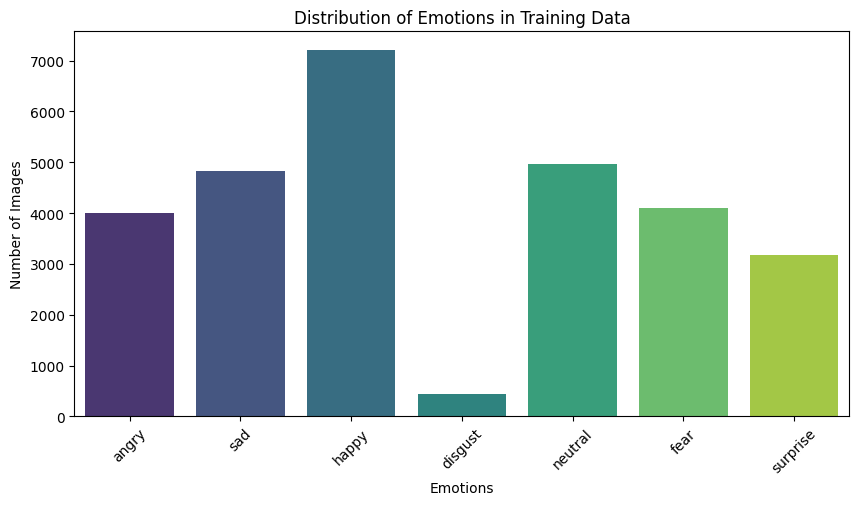

In [50]:
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
sns.barplot(x=train_emotions, y=train_counts, palette='viridis')  # Create a bar plot for training data
plt.title('Distribution of Emotions in Training Data')  # Set the title of the plot
plt.xlabel('Emotions')  # Set the x-axis label
plt.ylabel('Number of Images')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()  # Display the plot

In [51]:
# Plotting Sample Images from Each Class

In [52]:
def plot_sample_images(dir_path, num_samples=3):  # Define a function to plot sample images
    plt.figure(figsize=(15, 10))  # Set the figure size for the sample images
    num_emotions = len(os.listdir(dir_path))  # Get the number of emotions
    for emotion in os.listdir(dir_path):  # Loop through each emotion folder
        emotion_dir = os.path.join(dir_path, emotion)  # Get the emotion directory
        sample_images = np.random.choice(os.listdir(emotion_dir), num_samples, replace=False)  # Randomly select sample images

        for i, img in enumerate(sample_images):  # Loop through the selected sample images
            img_path = os.path.join(emotion_dir, img)  # Get the full image path
            img_array = plt.imread(img_path)  # Read the image
            plt.subplot(num_emotions, num_samples, i + 1 + num_samples * list(train_emotions).index(emotion))  # Create a subplot for each sample image
            plt.imshow(img_array, cmap='gray')  # Display the image in gray scale
            plt.axis('off')  # Hide the axis
            plt.title(emotion)  # Set the title as the emotion
    plt.tight_layout()  # Adjust the layout
    plt.show()  # Display the sample images

In [53]:
# Plot sample images

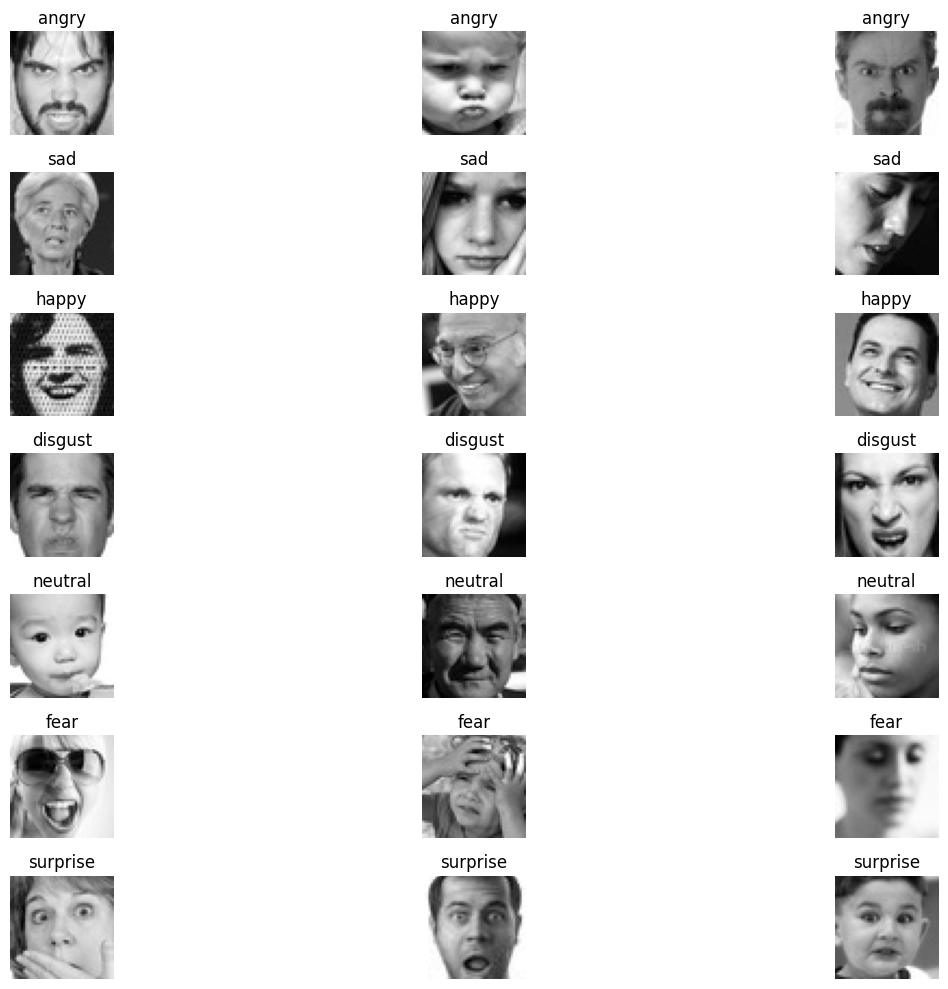

In [54]:
plot_sample_images(train_dir, num_samples=3)  # Call the function to plot sample images

In [55]:
#  Visualizing Image Dimensions

In [56]:
def image_dimensions(dir_path):  # Define a function to get image dimensions
    dimensions = []  # Initialize an empty list to store dimensions
    for emotion in os.listdir(dir_path):  # Loop through each emotion folder
        for img in os.listdir(os.path.join(dir_path, emotion)):  # Loop through each image in the emotion folder
            img_path = os.path.join(dir_path, emotion, img)  # Get the full image path
            with Image.open(img_path) as img:  # Open the image
                dimensions.append(img.size)  # Append the image size (width, height) to the list
    return dimensions  # Return the list of dimensions

In [57]:
dimensions = image_dimensions(train_dir)  # Get dimensions for all images in the training directory

In [58]:
# Convert to DataFrame

In [59]:
dim_df = pd.DataFrame(dimensions, columns=['Width', 'Height'])  # Create a DataFrame for image dimensions

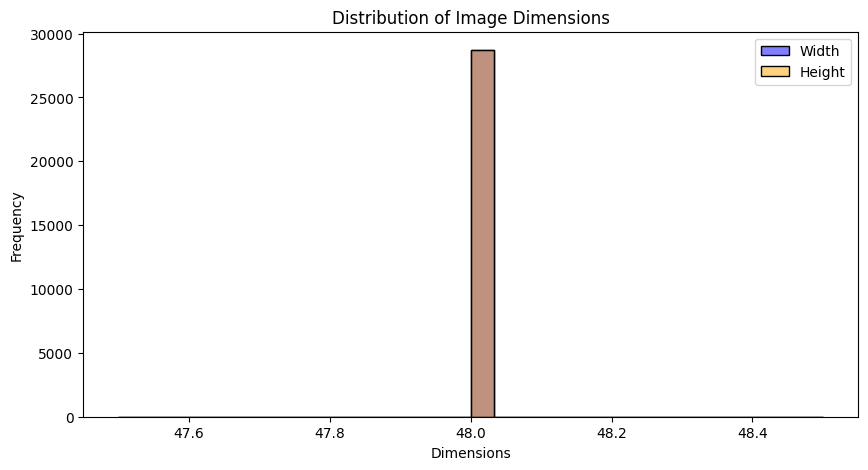

In [60]:
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
sns.histplot(dim_df['Width'], bins=30, color='blue', label='Width', kde=True)  # Plot histogram for image widths
sns.histplot(dim_df['Height'], bins=30, color='orange', label='Height', kde=True)  # Plot histogram for image heights
plt.title('Distribution of Image Dimensions')  # Set the title of the plot
plt.xlabel('Dimensions')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.legend()  # Show the legend
plt.show()  # Display the plot

In [61]:
# Analyzing Image Sizes

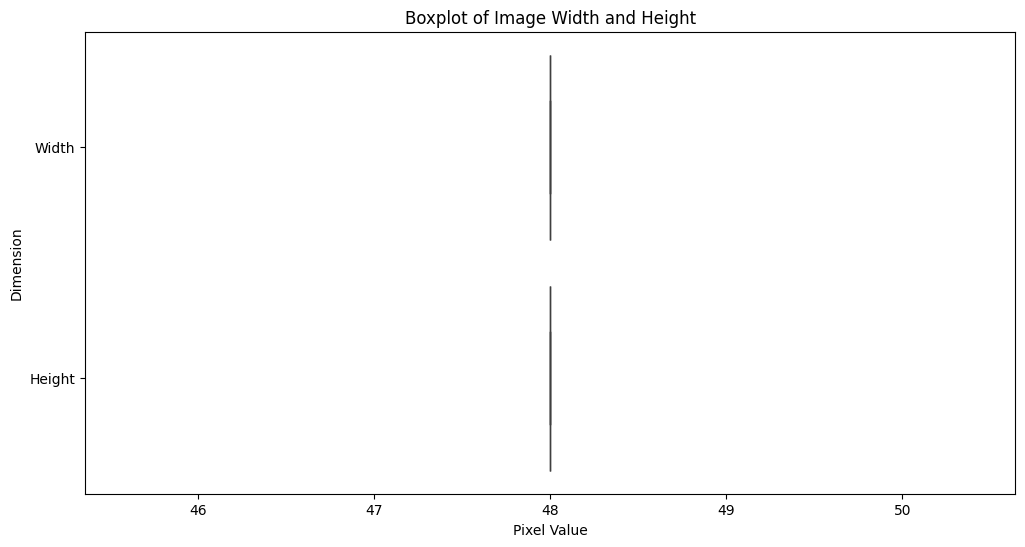

In [62]:
plt.figure(figsize=(12, 6))  # Set the figure size for the boxplot
sns.boxplot(data=dim_df, orient='h')  # Create a boxplot for image dimensions
plt.title('Boxplot of Image Width and Height')  # Set the title of the plot
plt.xlabel('Pixel Value')  # Set the x-axis label
plt.ylabel('Dimension')  # Set the y-axis label
plt.show()  # Display the plot

In [63]:
# Correlation Analysis of Image Dimensions

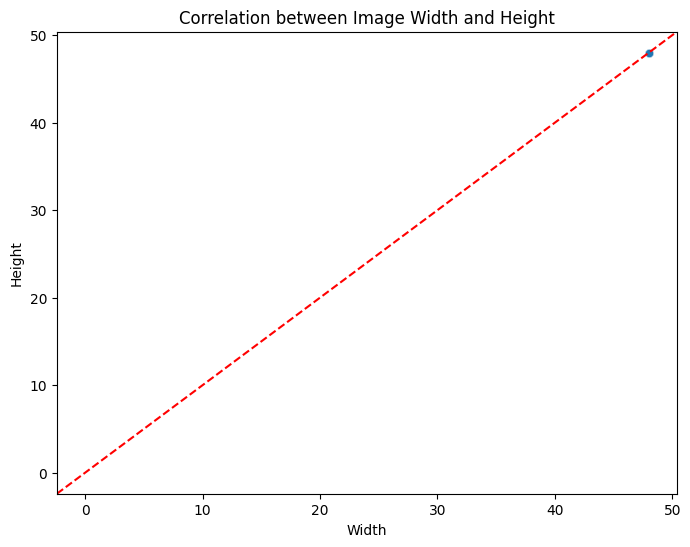

In [64]:
plt.figure(figsize=(8, 6))  # Set the figure size for the scatter plot
sns.scatterplot(data=dim_df, x='Width', y='Height', alpha=0.5)  # Create a scatter plot for image dimensions
plt.title('Correlation between Image Width and Height')  # Set the title of the plot
plt.xlabel('Width')  # Set the x-axis label
plt.ylabel('Height')  # Set the y-axis label
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Add a reference line for correlation
plt.show()  # Display the plot

In [65]:
# Visualizing Sample Images with Augmentation

In [66]:
def plot_augmented_images(image_path):  # Define a function to visualize augmented images
    original = plt.imread(image_path)  # Read the original image

    # Applying transformations
    flipped = np.fliplr(original)  # Flip the image horizontally
    rotated = np.rot90(original)  # Rotate the image 90 degrees

    # Plotting
    plt.figure(figsize=(15, 5))  # Set the figure size for the augmented images
    plt.subplot(1, 3, 1)  # Create a subplot for the original image
    plt.imshow(original)  # Display the original image
    plt.title('Original Image')  # Set the title for the original image
    plt.axis('off')  # Hide the axis

    plt.subplot(1, 3, 2)  # Create a subplot for the flipped image
    plt.imshow(flipped)  # Display the flipped image
    plt.title('Flipped Image')  # Set the title for the flipped image
    plt.axis('off')  # Hide the axis

    plt.subplot(1, 3, 3)  # Create a subplot for the rotated image
    plt.imshow(rotated)  # Display the rotated image
    plt.title('Rotated Image')  # Set the title for the rotated image
    plt.axis('off')  # Hide the axis

    plt.tight_layout()  # Adjust the layout
    plt.show()  # Display the augmented images

In [67]:
# Visualize augmented images

In [68]:
sample_image_path = os.path.join(train_dir, 'happy', os.listdir(os.path.join(train_dir, 'happy'))[0])  # Get a sample image path


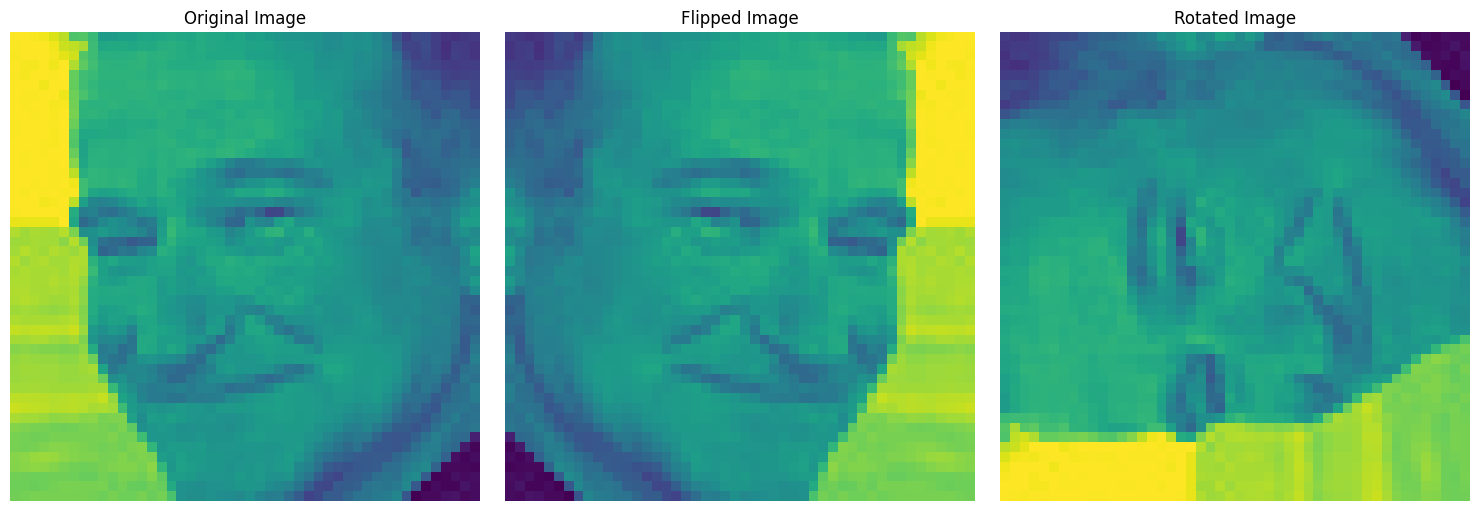

In [69]:
plot_augmented_images(sample_image_path)  # Call the function to visualize augmented images

In [70]:
# Visualizing Emotion Distribution in Testing Data

In [71]:
test_counts = [len(os.listdir(os.path.join(test_dir, emotion))) for emotion in os.listdir(test_dir)]  # Count images for each emotion in testing data


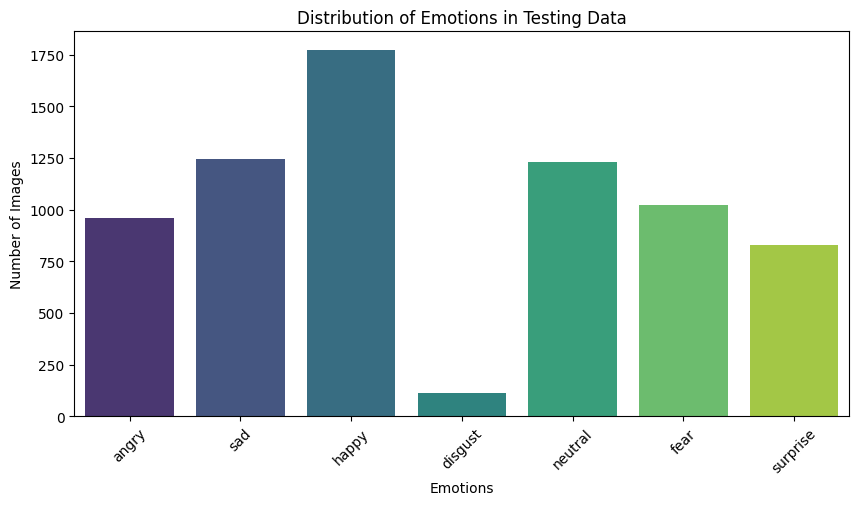

In [72]:
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
sns.barplot(x=train_emotions, y=test_counts, palette='viridis')  # Create a bar plot for testing data
plt.title('Distribution of Emotions in Testing Data')  # Set the title of the plot
plt.xlabel('Emotions')  # Set the x-axis label
plt.ylabel('Number of Images')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()  # Display the plot

# <span style="color:blue;">Data Augmentation for Training Data</span>

In this step, we utilize the `ImageDataGenerator` class from TensorFlow's Keras module to apply data augmentation techniques to the training images. This is essential for enhancing the model's ability to generalize and perform well on unseen data.

- Various augmentation parameters are set, such as rotation, width shift, height shift, shear, and zoom, to create variations of the training images.

# <span style="color:blue;">Data Preparation for Testing Data</span>

In this step, we prepare the testing data using the `ImageDataGenerator` class. Unlike the training data, we do not apply augmentation to the testing images, as we want to evaluate the model on original, unaltered images.

- The generator is configured to rescale the pixel values to the range [0, 1], making it suitable for input into the neural network.

In [73]:
# Image dimensions

In [74]:
img_width, img_height = 48, 48  # Define width and height of images

In [75]:
# Data augmentation for training data

In [76]:
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to [0, 1]
                                    rotation_range=20,  # Randomly rotate images
                                    width_shift_range=0.2,  # Randomly shift images horizontally
                                    height_shift_range=0.2,  # Randomly shift images vertically
                                    shear_range=0.2,  # Shear images
                                    zoom_range=0.2,  # Randomly zoom into images
                                    horizontal_flip=True,  # Randomly flip images
                                    fill_mode='nearest')  # Fill pixels that are newly created

In [77]:
# No data augmentation for test data, only rescaling

In [78]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values for test data

In [79]:
# Load training and testing data

In [80]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Directory containing training images
    target_size=(img_width, img_height),  # Resize images to target size
    color_mode='grayscale',  # Load images in grayscale
    class_mode='categorical',  # One-hot encode labels
    batch_size=32,  # Number of images to be yielded from the generator per iteration
    shuffle=True)  # Shuffle the training data

Found 28709 images belonging to 7 classes.


In [81]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Directory containing testing images
    target_size=(img_width, img_height),  # Resize images to target size
    color_mode='grayscale',  # Load images in grayscale
    class_mode='categorical',  # One-hot encode labels
    batch_size=32,  # Number of images to be yielded from the generator per iteration
    shuffle=False)  # Do not shuffle the test data

Found 7178 images belonging to 7 classes.


# <span style="color:blue;">Building the Model</span>

In this section, we define the architecture of the Convolutional Neural Network (CNN) model using Keras. The model typically consists of several layers:

- **Convolutional Layers**: Extract features from the input images through convolution operations, followed by activation functions (e.g., ReLU).
- **Pooling Layers**: Reduce the spatial dimensions of the feature maps, helping to minimize computational load and control overfitting.
- **Dropout Layers**: Randomly set a fraction of input units to zero during training to prevent overfitting.
- **Dense Layers**: Fully connected layers that learn to map the extracted features to the target classes.

- The output layer uses a softmax activation function for multi-class classification.

In [82]:
#  Building the CNN Model

In [83]:
model = Sequential()  # Initialize the model

In [84]:
# Add convolutional and pooling layers to the model

In [85]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))  # First convolutional layer


In [86]:
model.add(MaxPooling2D(pool_size=(2, 2)))  # First pooling layer

In [87]:
model.add(Conv2D(64, (3, 3), activation='relu'))  # Second convolutional layer

In [88]:
model.add(MaxPooling2D(pool_size=(2, 2)))  # Second pooling layer

In [89]:
model.add(Conv2D(128, (3, 3), activation='relu'))  # Third convolutional layer

In [90]:
model.add(MaxPooling2D(pool_size=(2, 2)))  # Third pooling layer

In [91]:
model.add(Flatten())  # Flatten the output from the previous layer

In [92]:
model.add(Dense(128, activation='relu'))  # Fully connected layer

In [93]:
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

In [94]:
model.add(Dense(7, activation='softmax'))  # Output layer for 7 classes (emotions)

# <span style="color:blue;">Compiling the Model</span>

In this step, we compile the CNN model by specifying the optimizer, loss function, and metrics to track during training.

- **Optimizer**: Adam optimizer is commonly used for its adaptive learning rate capabilities.
- **Loss Function**: Categorical crossentropy is appropriate for multi-class classification tasks.
- **Metrics**: Accuracy is set to evaluate the model's performance during training and validation.

In [95]:
# Compiling and Training the Model

In [96]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model

# <span style="color:blue;">Training the Model</span>

Here, we train the model using the training dataset.

- We specify the number of epochs and batch size for the training process.
- We also include validation data to monitor the model's performance on unseen data during training.
- Callbacks such as ModelCheckpoint can be used to save the best model during training based on validation loss.

In [97]:
# Callbacks for training

In [98]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)  # Early stopping

In [99]:
model_checkpoint = ModelCheckpoint('facial_expression_model.keras', save_best_only=True)  # Save the best model

In [100]:
# Fit the model with 2 epochs for fast execution

In [101]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),  # Number of steps per epoch
                    validation_data=test_generator,  # Validation data
                    validation_steps=len(test_generator),  # Number of validation steps
                    epochs=2,  # Reduced epochs for faster training
                    callbacks=[early_stopping, model_checkpoint])  # Callbacks

Epoch 1/2
898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 153ms/step - accuracy: 0.2450 - loss: 1.8289 - val_accuracy: 0.2602 - val_loss: 1.7647
Epoch 2/2
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


# <span style="color:blue;">Evaluating the Model</span>

In this step, we evaluate the trained model's performance on the testing dataset.

- We compute various metrics, including accuracy, loss, and potentially confusion matrix, to assess how well the model generalizes to new data.

In [102]:
#  Evaluating the Model

In [103]:
# Load the best model

In [104]:
model = load_model('facial_expression_model.keras')  # Load the saved model

In [105]:
# Evaluate the model

In [106]:
test_loss, test_accuracy = model.evaluate(test_generator)  # Evaluate on test data

225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.2040 - loss: 1.8156


In [107]:
print(f'Test Accuracy: {test_accuracy:.2f}')  # Print test accuracy

Test Accuracy: 0.26


In [108]:
# Confusion matrix and classification report

In [109]:
test_generator.reset()  # Reset the test generator

In [110]:
predictions = model.predict(test_generator)  # Get predictions

225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step


In [111]:
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted classes

In [112]:
true_classes = test_generator.classes  # Get true classes

In [113]:
# Print confusion matrix and classification report

In [114]:
print(confusion_matrix(true_classes, predicted_classes))  # Confusion matrix

[[   1    0   34  743    0  146   34]
 [   0    0    1   97    0   13    0]
 [   0    0   30  850    0  103   41]
 [   1    0   17 1517    1  187   51]
 [   0    0   11 1025    0  192    5]
 [   0    0   14 1019    0  199   15]
 [   0    0   28  646    1   35  121]]


In [115]:
print(classification_report(true_classes, predicted_classes))  # Classification report

              precision    recall  f1-score   support

           0       0.50      0.00      0.00       958
           1       0.00      0.00      0.00       111
           2       0.22      0.03      0.05      1024
           3       0.26      0.86      0.40      1774
           4       0.00      0.00      0.00      1233
           5       0.23      0.16      0.19      1247
           6       0.45      0.15      0.22       831

    accuracy                           0.26      7178
   macro avg       0.24      0.17      0.12      7178
weighted avg       0.25      0.26      0.16      7178



# <span style="color:blue;">Saving the Model</span>

In this step, we save the trained model to disk for future use.

- This allows us to easily load and use the model later without needing to retrain it.
- The model is typically saved in a format compatible with TensorFlow/Keras.

In [116]:
#  Save the model (optional, but can keep it consistent)


In [117]:
model.save('facial_expression_model.keras')  # Save the model

# <span style="color:blue;">Deploying the Model with Flask</span>

In this section, we set up a simple web application using Flask to deploy the trained model.

- We create routes to handle incoming requests, allowing users to upload images and receive predictions.
- The web application enables the model to be used interactively in a user-friendly manner.

In [118]:
#  Model Deployment (Basic Flask App)

In [119]:
app = Flask(__name__)  # Initialize the Flask app

In [121]:
@app.route('/predict', methods=['POST'])  # Define the predict endpoint
def predict():
    if request.method == 'POST':  # Check if the request method is POST
        file = request.files['file']  # Get the uploaded file
        img_path = '/content/temp_image.jpg'  # Path to save the uploaded image
        file.save(img_path)  # Save the uploaded file

        # Load and preprocess the image
        img = load_img(img_path, target_size=(img_width, img_height), color_mode='grayscale')  # Load the image
        img_array = img_to_array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the emotion
        prediction = model.predict(img_array)  # Get prediction
        predicted_class = np.argmax(prediction)  # Get the predicted class

        # Map predicted class to emotion
        emotions = list(train_generator.class_indices.keys())  # Get list of emotions
        predicted_emotion = emotions[predicted_class]  # Get predicted emotion

        return jsonify({'emotion': predicted_emotion})  # Return the predicted emotion as JSON

In [122]:
# Run the Flask app (uncomment to run)

In [125]:
if __name__ == '__main__':  # Check if the script is being run directly
    app.run(host='0.0.0.0', port=5000)  # Run the app on all interfaces at port 5000

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


# <span style="color:blue;">Conclusion</span>

In this final step, we summarize the key takeaways from the project.

- We have successfully built, trained, and evaluated a CNN model for facial expression recognition.
- The deployment of the model as a web application allows for practical application and further experimentation.
- Future work could involve exploring more complex models, improving augmentation techniques, or expanding the dataset.